[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figures 8.1, 8.5 and 8.6

Examples of two-dimensional Gaussian random vectors with different correlation coefficients between the two entries\
Topics: Correlation, Gaussian random vector, decomposition of variance, explained variance

Author: Carlos Fernandez-Granda

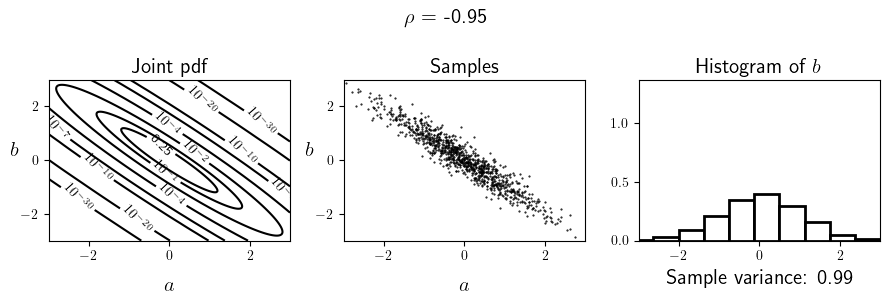

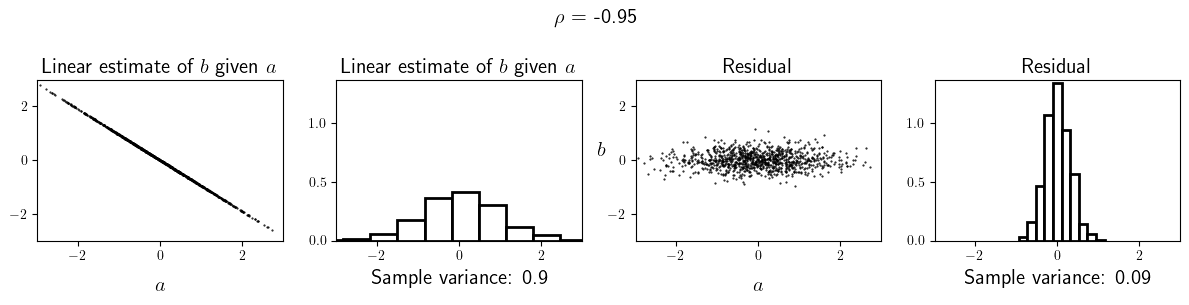

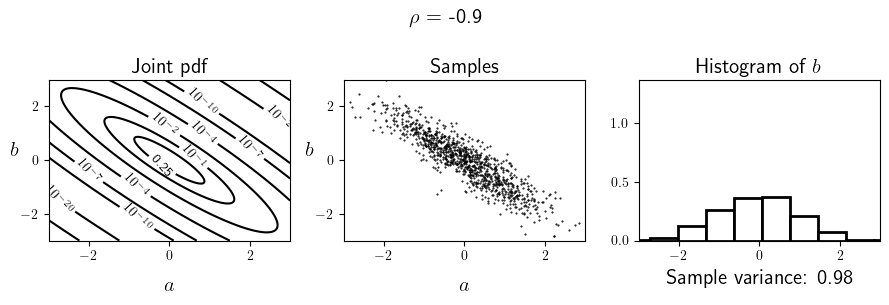

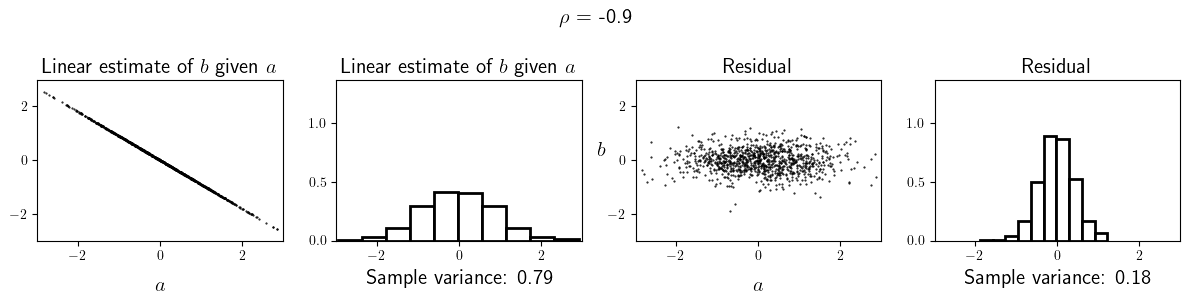

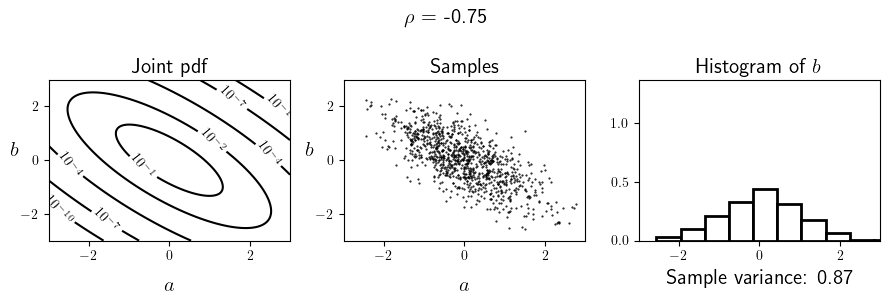

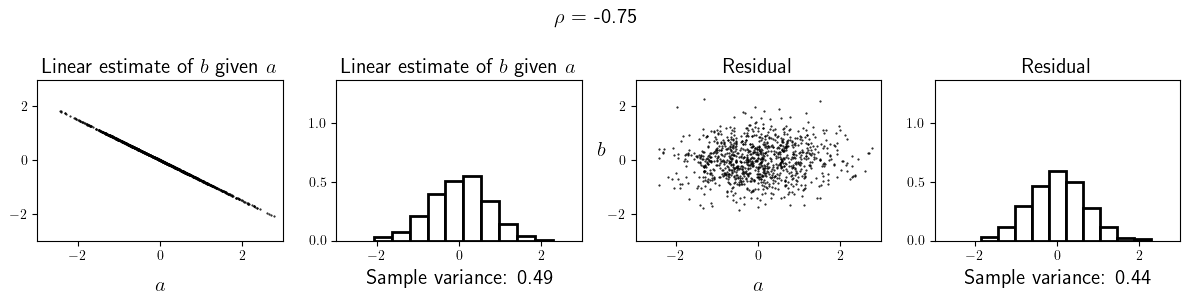

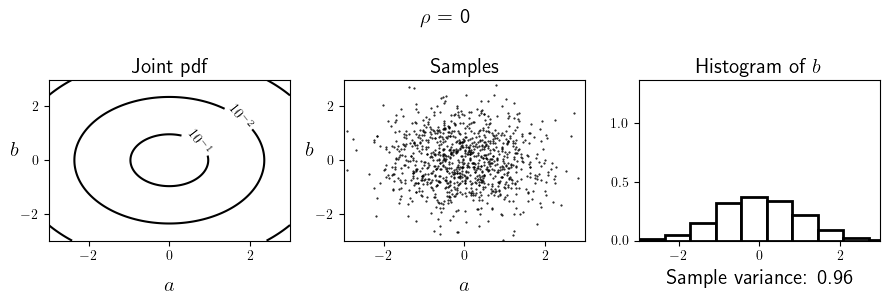

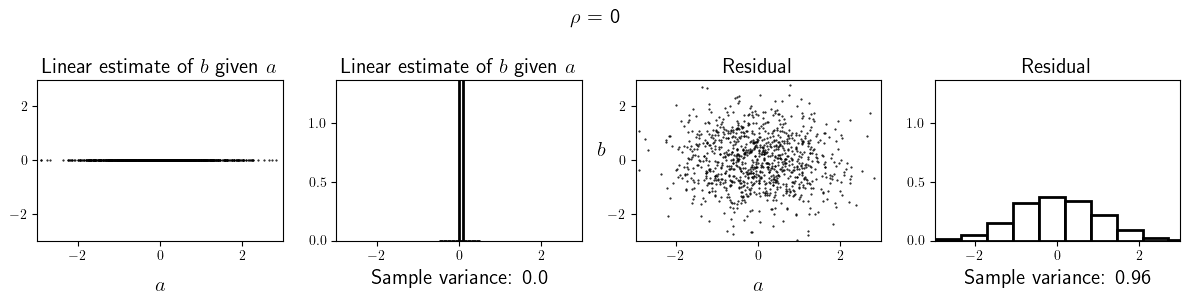

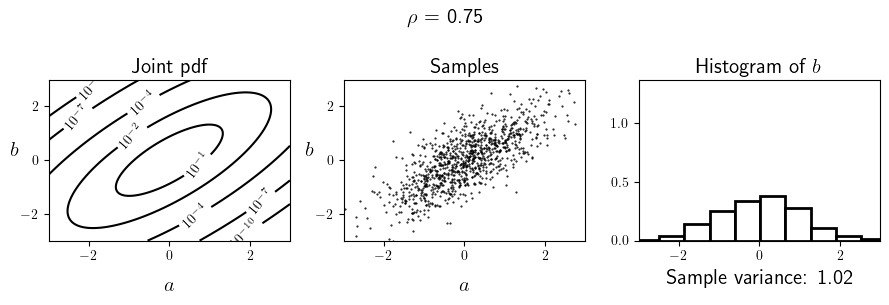

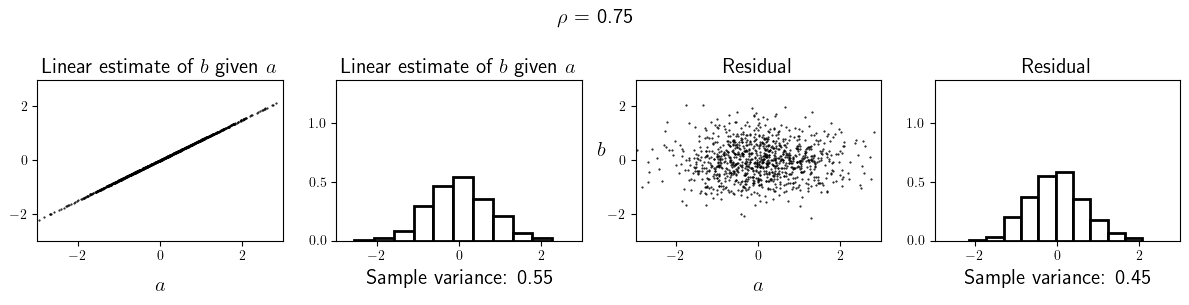

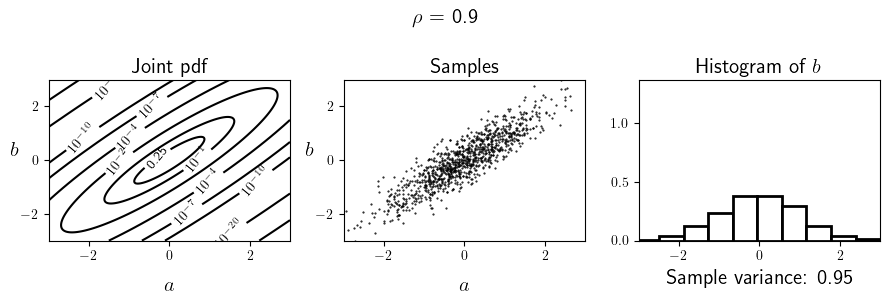

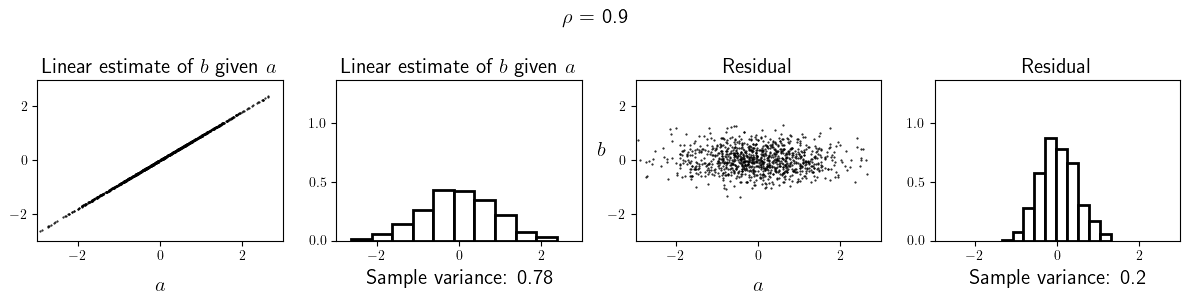

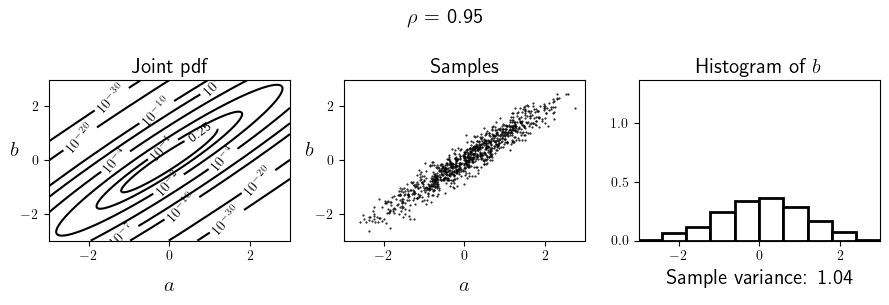

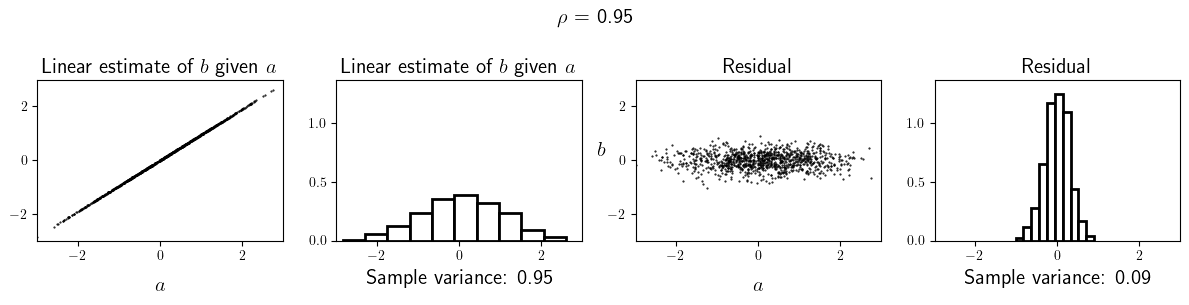

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
from numpy.random import default_rng
rng = default_rng(2021)

font_size = 15
font_size_ticks = 15

xmin = -2.99
xmax = 2.99
ymin = -2.99
ymax = 2.99
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax,200)

def gaussian(x,y,rho):
    return (np.exp(-( x**2 - 2*rho*x*y + y**2)/2/(1-rho**2))
                  /(2 * np.pi * np.sqrt(1-rho**2)))

X, Y = np.meshgrid(x, y)

rho_vals = [-0.95,-0.9,-0.75,0,0.75,0.9,0.95]
level_list = [1e-30,1e-20,1e-10,1e-7,1e-4,1e-2,1e-1,0.25]
cond_val = 1.0
f_max = 0.39
n=1000
ymax_hist = 1.37

# We report sample variance, which will be a bit different from the true variance due to the limited sample size
for ind,rho in enumerate(rho_vals):
    
    fig, axes = plt.subplots(1, 3, figsize=(9,3),width_ratios=[1,1,1])
    fig.suptitle(r"$\rho$ = "+str(rho),fontsize=font_size,y = 1)

    Z = gaussian(X, Y,rho)

    CS = axes[0].contour(X, Y, Z, levels = level_list,colors='black')
    fmt = {}
    strs = [r'$10^{-30}$',r'$10^{-20}$',r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$','0.25']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    axes[0].clabel(CS, inline=1,fmt=fmt)
    axes[0].set_xlabel(r"$a$", fontsize=font_size,labelpad=10)
    h = axes[0].set_ylabel(r"$b$", fontsize=font_size,labelpad=5)
    h.set_rotation(0)
    axes[0].set_ylim([ymin,ymax])
    axes[0].set_xlim([xmin,xmax])
    axes[0].set_title(r"Joint pdf", fontsize=font_size,pad=5)

    samples = rng.multivariate_normal([0,0], [[1,rho],[rho,1]], size=n)

    axes[1].plot(samples[:,0],samples[:,1],'.',ms=1,color='black',rasterized=True)
    axes[1].set_xlabel(r"$a$", fontsize=font_size,labelpad=10)
    h = axes[1].set_ylabel(r"$b$", fontsize=font_size,labelpad=5)
    h.set_rotation(0)
    axes[1].set_ylim([ymin,ymax])
    axes[1].set_xlim([xmin,xmax])
    axes[1].set_title(r"Samples", fontsize=font_size,pad=5)

    axes[2].set_xlim([xmin,xmax])
    axes[2].hist(samples[:,1],
             color='white', edgecolor='black',
              linewidth=2,density=True)
    axes[2].set_ylim([0,ymax_hist])
    axes[2].set_title(r"Histogram of $b$", fontsize=font_size,pad=5)
    axes[2].set_xlabel(r"Sample variance: "+str(round(np.var(samples[:,1]),2)), fontsize=font_size,labelpad=5)

    plt.tight_layout()
    
    fig, axes = plt.subplots(1, 4, figsize=(12,3),width_ratios=[1,1,1,1])
    fig.suptitle(r"$\rho$ = "+str(rho),fontsize=font_size,y = 1)

    axes[0].plot(samples[:,0],rho*samples[:,0],'.',ms=1,color='black',rasterized=True)
    axes[0].set_xlabel(r"$a$", fontsize=font_size,labelpad=10)
    axes[0].set_ylim([ymin,ymax])
    axes[0].set_xlim([xmin,xmax])
    axes[0].set_title(r"Linear estimate of $b$ given $a$", fontsize=font_size,pad=5)

    axes[1].set_xlim([xmin,xmax])
    axes[1].hist(rho*samples[:,0],#bins=n_bins,log=True,
             color='white', edgecolor='black',
              linewidth=2,density=True)
    axes[1].set_ylim([0,ymax_hist])
    axes[1].set_title(r"Linear estimate of $b$ given $a$", fontsize=font_size,pad=5)
    axes[1].set_xlabel(r"Sample variance: "+str(round(np.var(rho*samples[:,0]),2)), fontsize=font_size,labelpad=5)

    axes[2].plot(samples[:,0],samples[:,1]-rho*samples[:,0],'.',ms=1,color='black',rasterized=True)
    axes[2].set_xlabel(r"$a$", fontsize=font_size,labelpad=10)
    h = axes[2].set_ylabel(r"$b$", fontsize=font_size,labelpad=5)
    h.set_rotation(0)
    axes[2].set_ylim([ymin,ymax])
    axes[2].set_xlim([xmin,xmax])
    axes[2].set_title(r"Residual", fontsize=font_size,pad=5)
    
    axes[3].set_xlim([xmin,xmax])
    axes[3].hist(samples[:,1] - rho*samples[:,0],#bins=n_bins,log=True,
             color='white', edgecolor='black',
              linewidth=2,density=True)
    axes[3].set_ylim([0,ymax_hist])
    axes[3].set_title(r"Residual", fontsize=font_size,pad=5)
    axes[3].set_xlabel(r"Sample variance: "+str(round(np.var(samples[:,1] - rho*samples[:,0]),2)), fontsize=font_size,labelpad=5)

    plt.tight_layout();

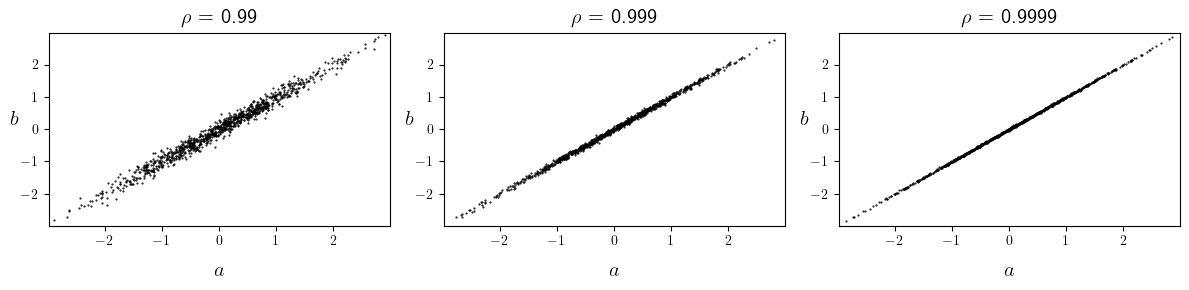

In [13]:
rho_vals = [0.99,0.999,0.9999]
n=1000

fig, axes = plt.subplots(1, 3, figsize=(12,3),width_ratios=[1,1,1])

for ind,rho in enumerate(rho_vals):
    
    samples = rng.multivariate_normal([0,0], [[1,rho],[rho,1]], size=n)
    axes[ind].plot(samples[:,0],samples[:,1],'.',ms=1,color='black',rasterized=True)
    axes[ind].set_xlabel(r"$a$", fontsize=font_size,labelpad=10)
    h = axes[ind].set_ylabel(r"$b$", fontsize=font_size,labelpad=5)
    h.set_rotation(0)
    axes[ind].set_ylim([ymin,ymax])
    axes[ind].set_xlim([xmin,xmax])
    axes[ind].set_title(r"$\rho$ = "+str(rho),fontsize=font_size)

plt.tight_layout();